In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  *
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('final.csv')

In [7]:
df.isnull().count()

Unnamed: 0                                                       61
Age dependency ratio (% of working-age population)               61
Agriculture, forestry, and fishing, value added (% of GDP)       61
Agriculture, forestry, and fishing, value added (current US$)    61
Arms imports (SIPRI trend indicator values)                      61
                                                                 ..
Total reserves (includes gold, current US$)                      61
Total reserves minus gold (current US$)                          61
Trade (% of GDP)                                                 61
Urban population                                                 61
Urban population (% of total population)                         61
Length: 68, dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0                                                       0
Age dependency ratio (% of working-age population)               0
Agriculture, forestry, and fishing, value added (% of GDP)       0
Agriculture, forestry, and fishing, value added (current US$)    0
Arms imports (SIPRI trend indicator values)                      0
                                                                ..
Total reserves (includes gold, current US$)                      0
Total reserves minus gold (current US$)                          0
Trade (% of GDP)                                                 0
Urban population                                                 0
Urban population (% of total population)                         0
Length: 68, dtype: int64

In [9]:
df.head(10)

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,...,450547675.0,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,423000000.0,11.296833,80756165.0,17.924
1,1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,...,459642166.0,376759491.0,81.968,38.325875,2.303808e+09,6.663571e+08,418000000.0,10.261163,82882675.0,18.032
2,1962 [YR1962],79.187531,38.371335,1.617792e+10,3.710000e+08,21.930703,18.031311,1.965947e+08,15.186626,2.663693,...,469077191.0,383620708.0,81.782,39.935845,2.674898e+09,5.127918e+08,265000000.0,10.200790,85456483.0,18.218
3,1963 [YR1963],80.304725,39.319751,1.903938e+10,6.470000e+08,21.116283,16.821091,-3.076154e+08,14.641317,2.742170,...,478825602.0,390697750.0,81.595,38.095180,3.294071e+09,6.078625e+08,360000000.0,10.187338,88127852.0,18.405
4,1964 [YR1964],80.998952,41.187738,2.326295e+10,9.200000e+08,19.806398,22.411741,-2.171540e+08,13.448422,3.108394,...,488848139.0,397946828.0,81.405,36.340821,3.758864e+09,4.991451e+08,251000000.0,9.410549,90901311.0,18.595
5,1965 [YR1965],81.122177,38.952143,2.319789e+10,1.049000e+09,20.828616,20.644809,4.349693e+08,14.093783,3.402906,...,499123328.0,405363011.0,81.215,37.450738,4.352338e+09,6.008509e+08,319000000.0,8.519034,93760317.0,18.785
6,1966 [YR1966],81.518179,40.025448,1.835786e+10,9.940000e+08,20.460463,15.391781,7.380118e+08,13.766973,3.770483,...,509631509.0,412918738.0,81.023,36.459797,3.121317e+09,6.096946e+08,365000000.0,10.814238,96712771.0,18.977
7,1967 [YR1967],81.306085,42.767622,2.144152e+10,1.265000e+09,19.105770,14.430829,-1.807330e+08,12.499599,4.262991,...,520400577.0,420634582.0,80.829,34.609556,3.251690e+09,6.637641e+08,419000000.0,9.981063,99765995.0,19.171
8,1968 [YR1968],80.684557,41.633551,2.210136e+10,1.655000e+09,19.761847,14.363835,-9.723466e+08,12.274548,4.401002,...,531513834.0,428580865.0,80.634,35.054131,3.644432e+09,7.303527e+08,439000000.0,8.981744,102932969.0,19.366
9,1969 [YR1969],79.952746,41.358343,2.417312e+10,1.518000e+09,20.374808,12.835878,-2.097967e+07,11.585735,4.375294,...,543084333.0,436846176.0,80.438,34.305853,4.076415e+09,9.277641e+08,683000000.0,7.744777,106238157.0,19.562


In [10]:
df.describe()

,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
count,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,...,6.100000e+01,6.100000e+01,61.000000,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000
mean,68.534189,27.692254,1.268410e+11,2.000148e+09,46.532631,9.037147,1.207121e+10,19.312167,47.276433,27.403517,...,8.887745e+08,6.476707e+08,74.454361,39.795285,5.546221e+10,9.802227e+10,9.059697e+10,23.601278,2.411038e+08,25.545639
std,10.239419,8.973891,1.287231e+11,1.082420e+09,21.235622,5.091608,1.963326e+10,4.907483,52.337709,14.860393,...,2.929978e+08,1.736535e+08,4.902342,4.960221,7.057469e+10,1.497102e+11,1.406102e+11,15.145568,1.206712e+08,4.902342
min,48.664620,15.970157,1.529810e+10,3.710000e+08,19.105770,3.179795,-1.894422e+10,11.398051,2.527487,7.843133,...,4.505477e+08,3.697915e+08,65.074000,32.947706,2.035209e+09,4.991451e+08,2.510000e+08,7.661769,8.075616e+07,17.924000
25%,59.941743,17.814691,3.519983e+10,1.184000e+09,24.466318,4.764536,1.965947e+08,14.443072,7.586970,14.933733,...,6.231029e+08,4.901826e+08,70.765000,35.521655,8.585605e+09,2.324650e+09,1.089133e+09,12.219272,1.329203e+08,21.332000
50%,71.733071,26.896438,7.686453e+10,1.807000e+09,42.816336,7.054559,2.611176e+09,20.833257,22.949008,23.832055,...,8.732778e+08,6.501815e+08,74.453000,37.849668,2.824135e+10,1.151174e+10,6.453558e+09,15.506262,2.230963e+08,25.547000
75%,76.999841,35.269501,1.445529e+11,2.769000e+09,65.548122,12.659441,2.145105e+10,23.696514,66.043851,40.067980,...,1.147610e+09,8.121062e+08,78.668000,44.442933,6.893745e+10,1.378248e+11,1.319243e+11,37.503814,3.355038e+08,29.235000
max,81.518179,42.767622,4.805041e+11,5.381000e+09,88.876075,24.018156,8.046947e+10,29.468682,184.328815,55.250914,...,1.380004e+09,8.980241e+08,82.076000,49.859559,2.665373e+11,5.902274e+11,5.490869e+11,55.793722,4.819803e+08,34.926000


In [11]:
df.shape

(61, 68)

In [12]:
df.columns

Index(['Unnamed: 0', 'Age dependency ratio (% of working-age population)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Arms imports (SIPRI trend indicator values)', 'Broad money (% of GDP)',
       'Broad money to total reserves ratio',
       'Changes in inventories (current US$)',
       'Claims on central government, etc. (% GDP)',
       'Consumer price index (2010 = 100)',
       'Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Exports of goods and services (current US$)',
       'External balance on goods and services (% of GDP)',
       'External balance on goods and services (current US$)',
       'Final consumption expenditure (% of GDP)',
       'Final consumption expenditure (current US$)',
       'Fixed telephone subscriptions',
       'Fixed telephon

In [23]:
df.dtypes

Unnamed: 0                                                        object
Age dependency ratio (% of working-age population)               float64
Agriculture, forestry, and fishing, value added (% of GDP)       float64
Agriculture, forestry, and fishing, value added (current US$)    float64
Arms imports (SIPRI trend indicator values)                      float64
                                                                  ...   
Total reserves (includes gold, current US$)                      float64
Total reserves minus gold (current US$)                          float64
Trade (% of GDP)                                                 float64
Urban population                                                 float64
Urban population (% of total population)                         float64
Length: 68, dtype: object

In [14]:
c = df.columns

In [13]:
df

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,...,4.505477e+08,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,4.230000e+08,11.296833,80756165.0,17.924
1,1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,...,4.596422e+08,376759491.0,81.968,38.325875,2.303808e+09,6.663571e+08,4.180000e+08,10.261163,82882675.0,18.032
2,1962 [YR1962],79.187531,38.371335,1.617792e+10,3.710000e+08,21.930703,18.031311,1.965947e+08,15.186626,2.663693,...,4.690772e+08,383620708.0,81.782,39.935845,2.674898e+09,5.127918e+08,2.650000e+08,10.200790,85456483.0,18.218
3,1963 [YR1963],80.304725,39.319751,1.903938e+10,6.470000e+08,21.116283,16.821091,-3.076154e+08,14.641317,2.742170,...,4.788256e+08,390697750.0,81.595,38.095180,3.294071e+09,6.078625e+08,3.600000e+08,10.187338,88127852.0,18.405
4,1964 [YR1964],80.998952,41.187738,2.326295e+10,9.200000e+08,19.806398,22.411741,-2.171540e+08,13.448422,3.108394,...,4.888481e+08,397946828.0,81.405,36.340821,3.758864e+09,4.991451e+08,2.510000e+08,9.410549,90901311.0,18.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016 [YR2016],50.888137,16.363801,3.755162e+11,3.003000e+09,74.549265,4.729837,2.058732e+10,25.224594,155.182121,...,1.324517e+09,885015936.0,66.818,47.749401,2.126772e+11,3.616943e+11,3.411452e+11,40.082486,439501314.0,33.182
57,2017 [YR2017],50.289637,16.558331,4.390397e+11,2.909000e+09,74.144189,4.764536,3.686001e+10,23.212274,160.346852,...,1.338677e+09,888881381.0,66.400,47.670890,2.458117e+11,4.126138e+11,3.893501e+11,40.742497,449795398.0,33.600
58,2018 [YR2018],49.775167,15.970157,4.313718e+11,1.485000e+09,74.147695,5.017477,4.548057e+10,22.107558,166.672645,...,1.352642e+09,892338114.0,65.970,48.509717,2.468067e+11,3.991672e+11,3.744252e+11,43.598657,460304169.0,34.030
59,2019 [YR2019],49.245242,16.677462,4.787272e+11,3.075000e+09,76.045964,4.709912,2.742585e+10,23.733819,172.878328,...,1.366418e+09,895386227.0,65.528,49.859559,2.665373e+11,4.634699e+11,4.323784e+11,39.386771,471031529.0,34.472


<Figure size 1440x1440 with 0 Axes>

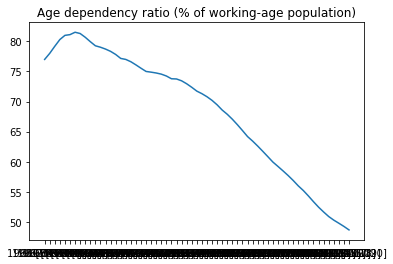

<Figure size 1440x1440 with 0 Axes>

In [19]:
plt.plot(df[c[0]],df[c[1]])
plt.title(c[1])
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

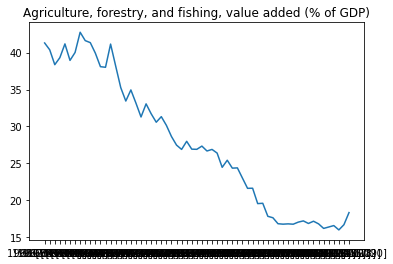

<Figure size 1440x1440 with 0 Axes>

In [20]:
plt.plot(df[c[0]],df[c[2]])
plt.title(c[2])
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

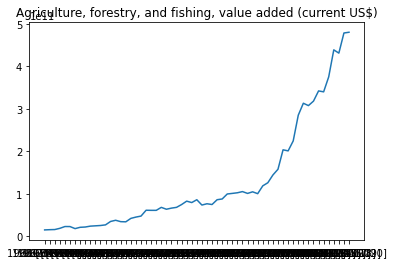

<Figure size 1440x1440 with 0 Axes>

In [21]:
plt.plot(df[c[0]],df[c[3]])
plt.title(c[3])
plt.figure(figsize=(20,20))

In [29]:
log_new = df.iloc[:,1:]
log_new = np.log(1.0+log_new)

<ipython-input-29-36caefc77c15>:2: RuntimeWarning: invalid value encountered in log
  log_new = np.log(1.0+log_new)


In [30]:
log_new

,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,4.356697,3.745091,23.450994,20.114460,3.138617,2.573892,19.940535,2.772593,1.260586,2.179641,...,19.925974,19.728450,4.419756,3.683426,21.433864,20.329537,19.862883,2.509342,18.206945,2.940431
1,4.369538,3.722977,23.486117,20.838379,3.113599,2.614431,NaN,2.755273,1.272659,2.252993,...,19.945959,19.747118,4.418455,3.671883,21.557829,20.317336,19.850992,2.421360,18.232937,2.946122
2,4.384368,3.673038,23.506913,19.731713,3.132477,2.946086,19.096655,2.784185,1.298472,2.300631,...,19.966278,19.765165,4.416211,3.712006,21.707177,20.055381,19.395240,2.415984,18.263518,2.955847
3,4.398204,3.696841,23.669775,20.287857,3.096314,2.880383,NaN,2.749916,1.319666,2.313273,...,19.986847,19.783445,4.413949,3.665999,21.915390,20.225459,19.701615,2.414783,18.294299,2.965531
4,4.406706,3.742130,23.870128,20.639884,3.035261,3.153238,NaN,2.670585,1.413032,2.255157,...,20.007562,19.801829,4.411646,3.620087,22.047383,20.028407,19.340964,2.342820,18.325285,2.975274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3.949090,2.854388,26.651567,21.822878,4.324785,1.745687,23.747941,3.266698,5.051023,3.914045,...,21.004314,20.601116,4.216828,3.886693,26.083042,26.614065,26.555574,3.715582,19.901151,3.531699
57,3.937489,2.865529,26.807856,21.791075,4.319409,1.751725,24.330393,3.186860,5.083556,3.907895,...,21.014947,20.605474,4.210645,3.885081,26.227832,26.745778,26.687745,3.731520,19.924303,3.543854
58,3.927407,2.831456,26.790236,21.118681,4.319455,1.794668,24.540551,3.140160,5.122014,3.939094,...,21.025326,20.609356,4.204245,3.902169,26.231871,26.712646,26.648658,3.797704,19.947398,3.556205
59,3.916916,2.872291,26.894397,21.846571,4.344402,1.742204,24.034752,3.208172,5.158356,3.934284,...,21.035458,20.612766,4.197623,3.929068,26.308780,26.862007,26.792567,3.698502,19.970436,3.568744


<Figure size 720x720 with 0 Axes>

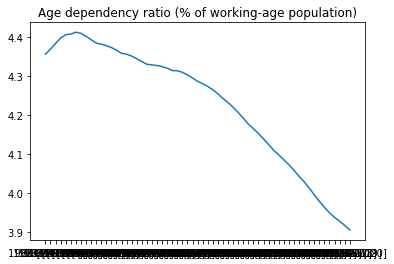

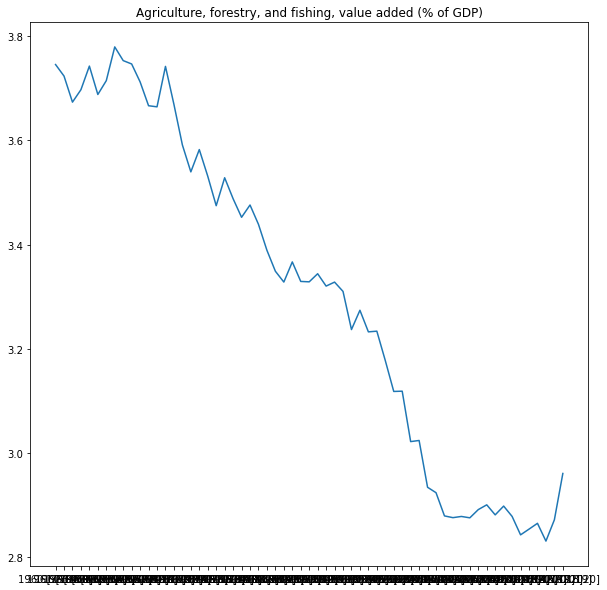

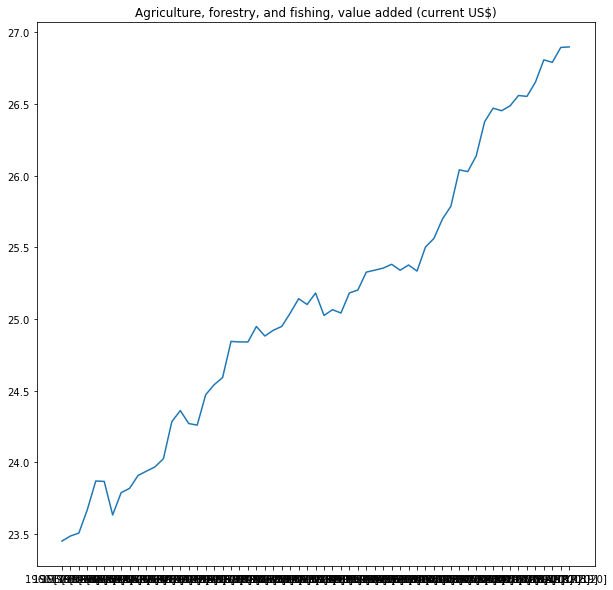

<Figure size 720x720 with 0 Axes>

In [32]:
plt.plot(df[c[0]],log_new[c[1]])
plt.title(c[1])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],log_new[c[2]])
plt.title(c[2])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],log_new[c[3]])
plt.title(c[3])
plt.figure(figsize=(10,10))

In [36]:
quantile_data = df.iloc[:,1:].T
pt = QuantileTransformer(output_distribution='normal')
quantile_data = pt.fit_transform(quantile_data)

C:\Users\joani\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (67). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


<Figure size 720x720 with 0 Axes>

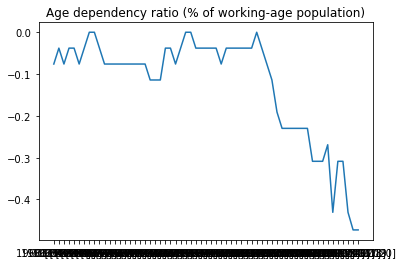

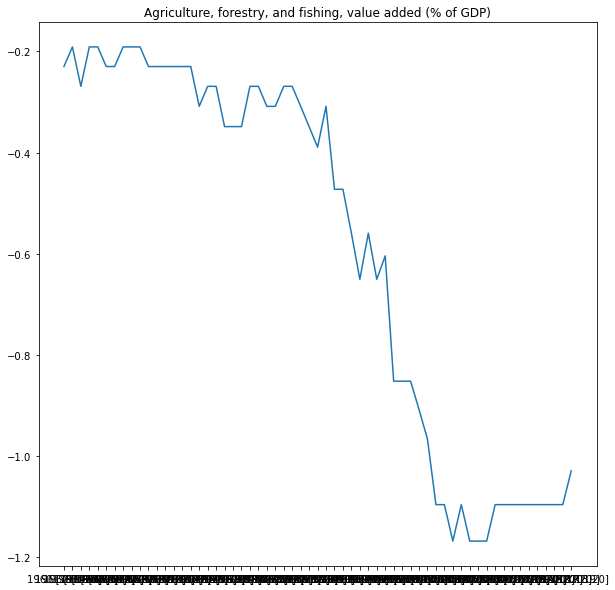

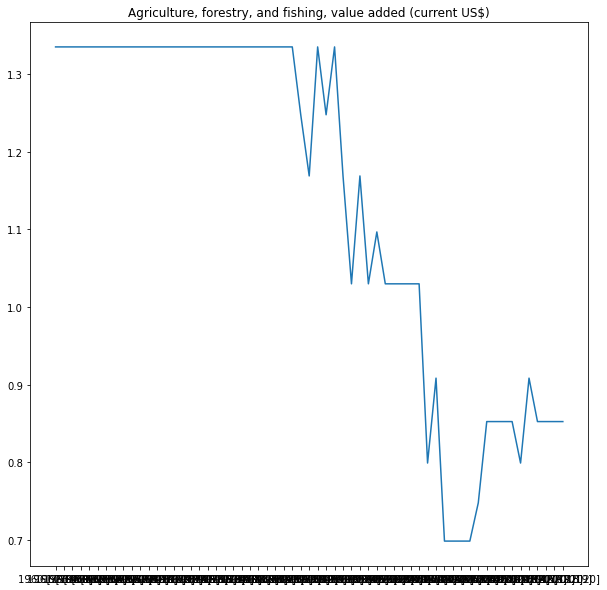

<Figure size 720x720 with 0 Axes>

In [37]:
plt.plot(df[c[0]],quantile_data[0])
plt.title(c[1])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[1])
plt.title(c[2])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[2])
plt.title(c[3])
plt.figure(figsize=(10,10))

In [38]:
yeo_data = df.iloc[:,1:].T
pt = PowerTransformer(method='yeo-johnson')
yeo_data = pt.fit_transform(yeo_data)

<Figure size 720x720 with 0 Axes>

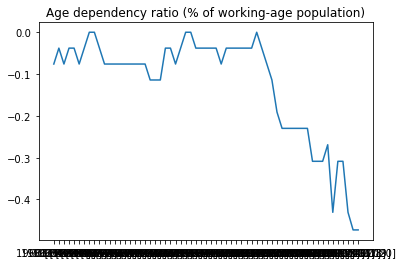

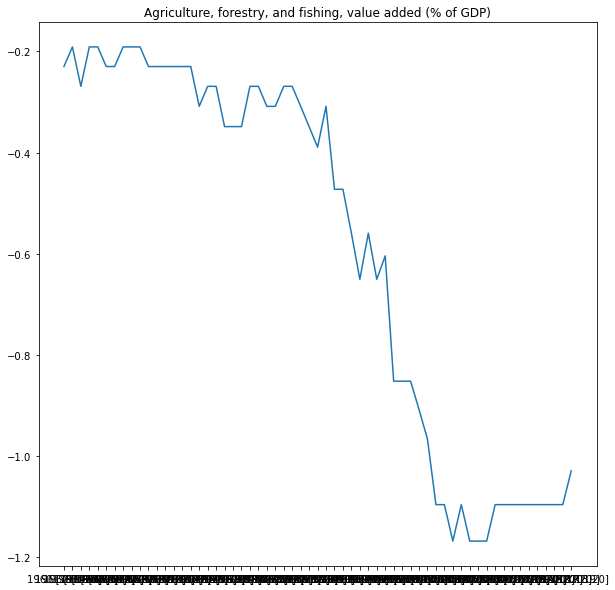

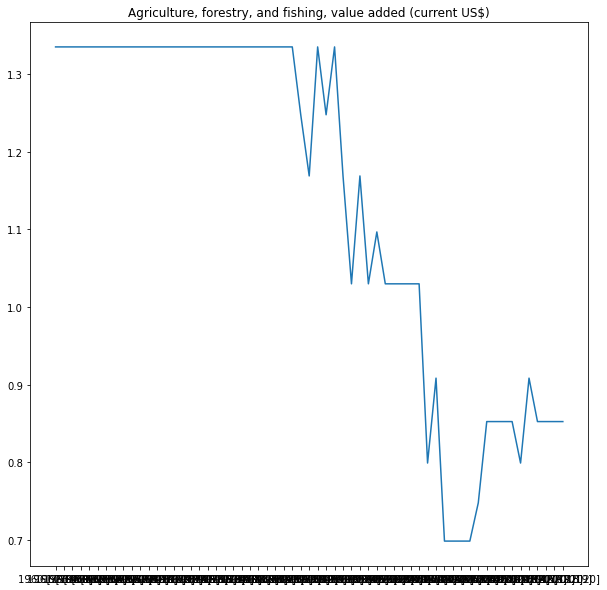

<Figure size 720x720 with 0 Axes>

In [39]:
plt.plot(df[c[0]],quantile_data[0])
plt.title(c[1])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[1])
plt.title(c[2])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[2])
plt.title(c[3])
plt.figure(figsize=(10,10))

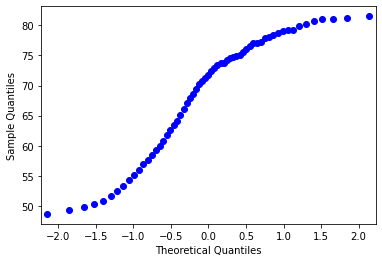

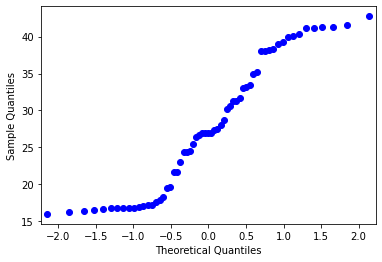

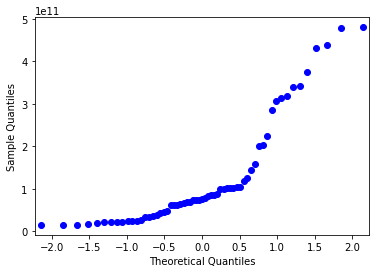

In [43]:
sm.qqplot(df.iloc[:,1])
plt.show()
sm.qqplot(df.iloc[:,2])
plt.show()
sm.qqplot(df.iloc[:,3])
plt.show()

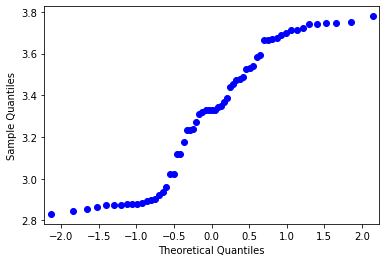

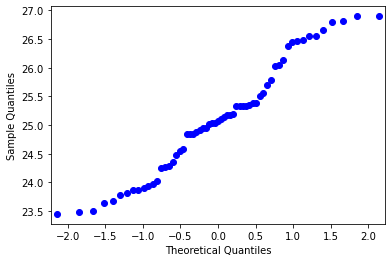

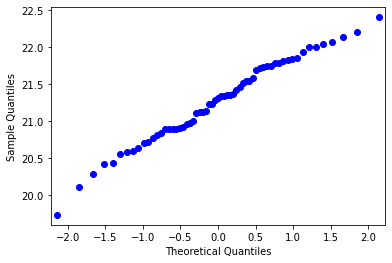

In [45]:
sm.qqplot(log_new.iloc[:,1])
plt.show()
sm.qqplot(log_new.iloc[:,2])
plt.show()
sm.qqplot(log_new.iloc[:,3])
plt.show()

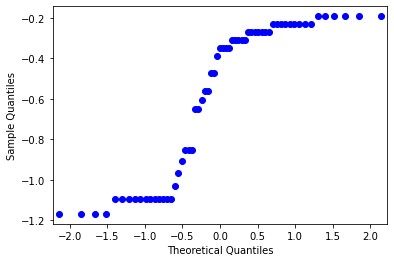

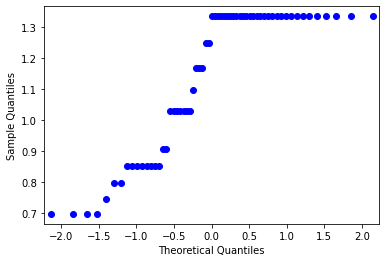

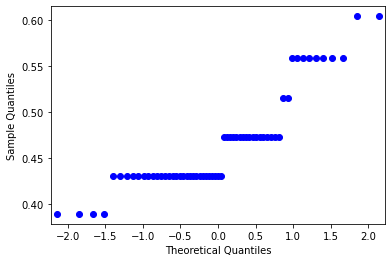

In [46]:
sm.qqplot(quantile_data[1])
plt.show()
sm.qqplot(quantile_data[2])
plt.show()
sm.qqplot(quantile_data[3])
plt.show()

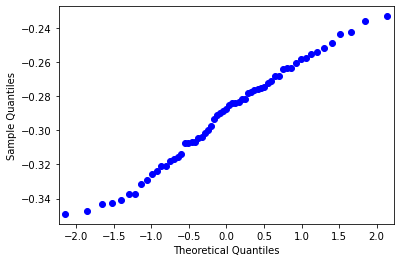

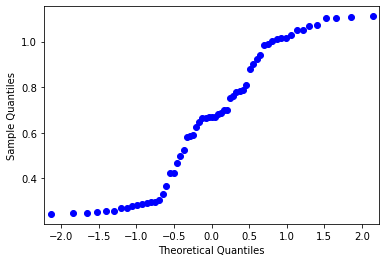

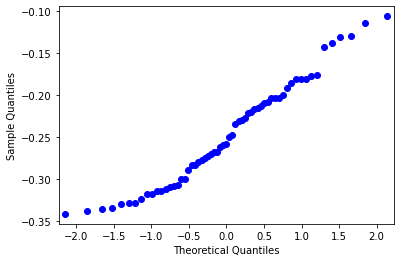

In [47]:
sm.qqplot(yeo_data[1])
plt.show()
sm.qqplot(yeo_data[2])
plt.show()
sm.qqplot(yeo_data[3])
plt.show()

In [73]:
df.kurtosis()

Age dependency ratio (% of working-age population)              -1.044546
Agriculture, forestry, and fishing, value added (% of GDP)      -1.355944
Agriculture, forestry, and fishing, value added (current US$)    1.120919
Arms imports (SIPRI trend indicator values)                      0.370350
Broad money (% of GDP)                                          -1.232960
                                                                   ...   
Total reserves (includes gold, current US$)                      1.189566
Total reserves minus gold (current US$)                          1.130611
Trade (% of GDP)                                                -0.766570
Urban population                                                -1.051298
Urban population (% of total population)                        -1.031869
Length: 67, dtype: float64

In [74]:
df.skew()

Age dependency ratio (% of working-age population)              -0.547876
Agriculture, forestry, and fishing, value added (% of GDP)       0.186145
Agriculture, forestry, and fishing, value added (current US$)    1.487342
Arms imports (SIPRI trend indicator values)                      0.864495
Broad money (% of GDP)                                           0.352047
                                                                   ...   
Total reserves (includes gold, current US$)                      1.504361
Total reserves minus gold (current US$)                          1.491047
Trade (% of GDP)                                                 0.817424
Urban population                                                 0.405969
Urban population (% of total population)                         0.139920
Length: 67, dtype: float64

In [75]:
log_new.kurtosis()

Age dependency ratio (% of working-age population)              -0.817131
Agriculture, forestry, and fishing, value added (% of GDP)      -1.423825
Agriculture, forestry, and fishing, value added (current US$)   -0.861330
Arms imports (SIPRI trend indicator values)                     -0.320127
Broad money (% of GDP)                                          -1.304061
                                                                   ...   
Total reserves (includes gold, current US$)                     -1.227802
Total reserves minus gold (current US$)                         -1.310656
Trade (% of GDP)                                                -1.294029
Urban population                                                -1.203750
Urban population (% of total population)                        -1.086810
Length: 67, dtype: float64

In [76]:
log_new.skew()

Age dependency ratio (% of working-age population)              -0.706074
Agriculture, forestry, and fishing, value added (% of GDP)      -0.108643
Agriculture, forestry, and fishing, value added (current US$)    0.165360
Arms imports (SIPRI trend indicator values)                     -0.270735
Broad money (% of GDP)                                          -0.128781
                                                                   ...   
Total reserves (includes gold, current US$)                      0.029557
Total reserves minus gold (current US$)                          0.070340
Trade (% of GDP)                                                 0.304663
Urban population                                                -0.205169
Urban population (% of total population)                        -0.118445
Length: 67, dtype: float64

In [78]:
pd.DataFrame(quantile_data).kurtosis()

0     6.007250
1     6.044451
2     6.027131
3     6.027131
4     6.027279
        ...   
56    6.026572
57    6.026572
58    6.026542
59    6.026542
60    6.026516
Length: 61, dtype: float64

In [79]:
pd.DataFrame(quantile_data).skew()

0     0.001744
1    -0.001754
2     0.000036
3     0.000036
4     0.000045
        ...   
56    0.000007
57    0.000007
58    0.000005
59    0.000005
60    0.000004
Length: 61, dtype: float64

In [80]:
pd.DataFrame(yeo_data).kurtosis()

0     8.394609
1     5.874961
2     7.896080
3     6.891853
4     7.893495
        ...   
56    5.168977
57    7.178635
58    7.428447
59    7.049049
60    7.312307
Length: 61, dtype: float64

In [81]:
pd.DataFrame(yeo_data).kurtosis()

0     8.394609
1     5.874961
2     7.896080
3     6.891853
4     7.893495
        ...   
56    5.168977
57    7.178635
58    7.428447
59    7.049049
60    7.312307
Length: 61, dtype: float64

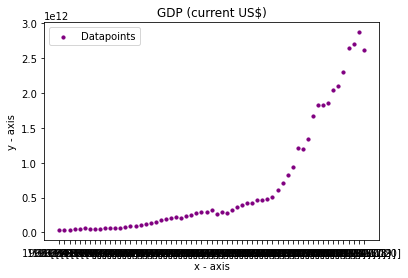

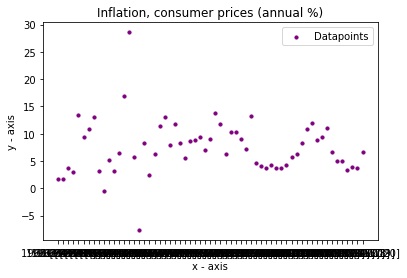

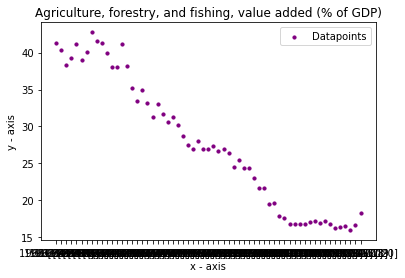

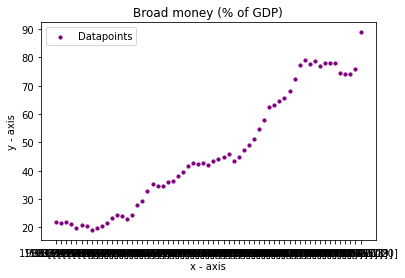

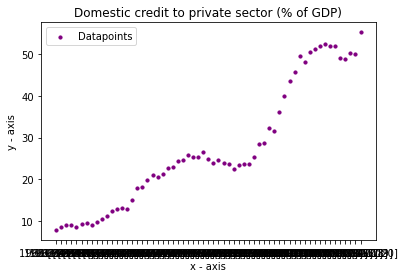

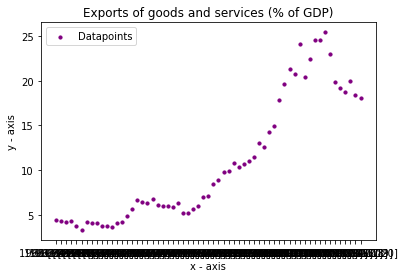

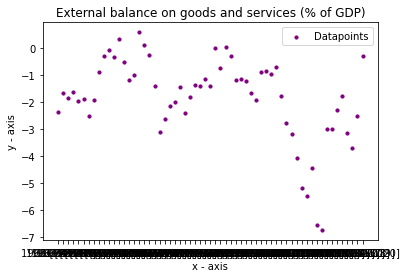

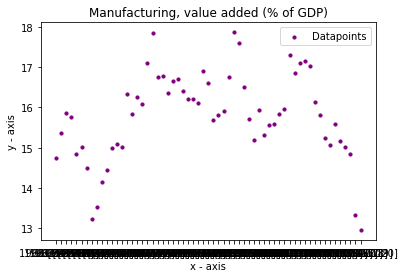

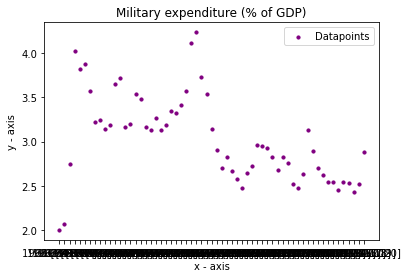

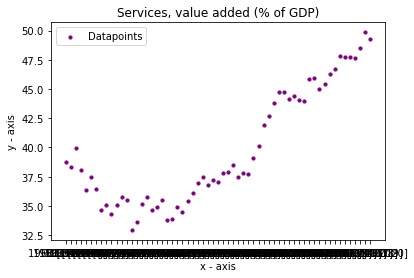

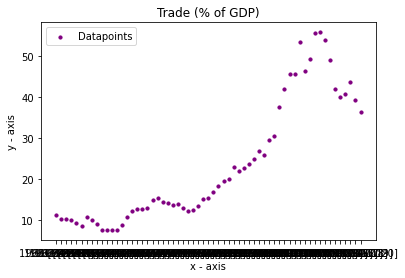

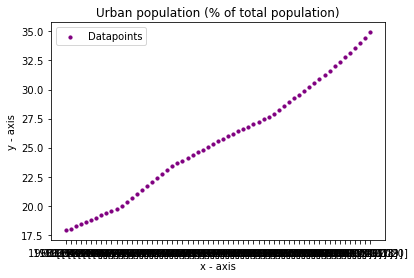

In [89]:
#This is a dictionary containing some important features (Manually choosen) for which plots will be drawn.
select_col= ["GDP (current US$)",'Inflation, consumer prices (annual %)',"Agriculture, forestry, and fishing, value added (% of GDP)", "Broad money (% of GDP)","Domestic credit to private sector (% of GDP)", "Exports of goods and services (% of GDP)", "External balance on goods and services (% of GDP)","Manufacturing, value added (% of GDP)","Military expenditure (% of GDP)", "Services, value added (% of GDP)", "Trade (% of GDP)", "Urban population (% of total population)"]        
for i in select_col:
    x = df[c[0]]
    y = df[i]
    plt.scatter(x, y, label= "Datapoints", color= "purple",marker= "o", s=10)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title(i)
    plt.legend()
    plt.show()

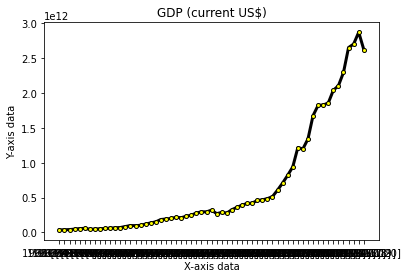

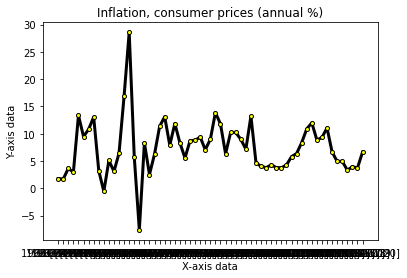

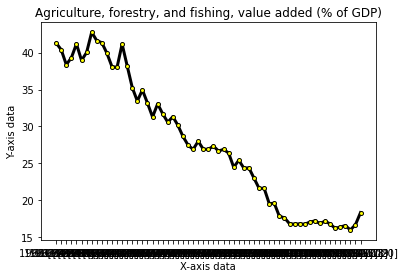

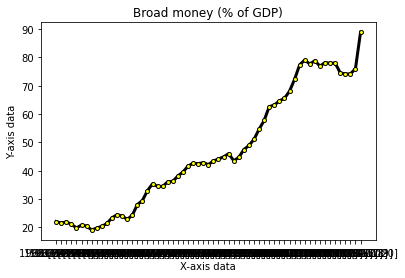

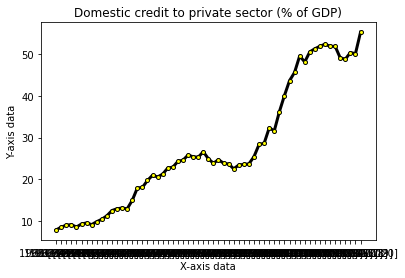

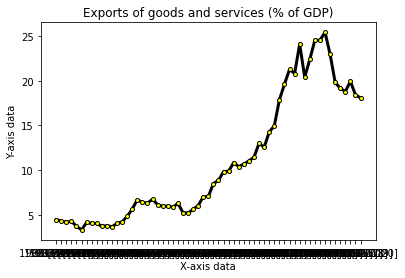

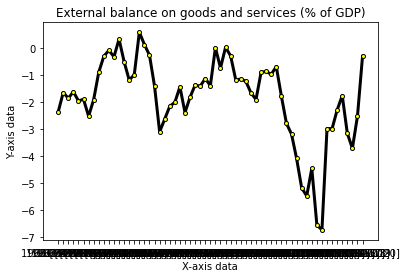

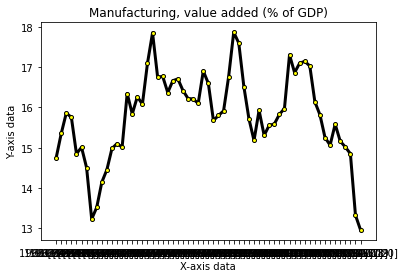

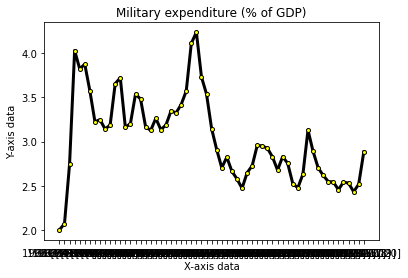

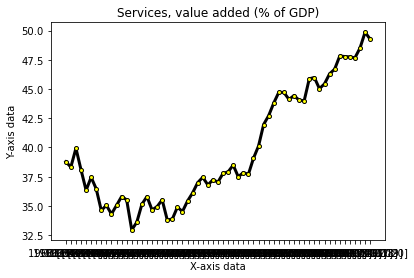

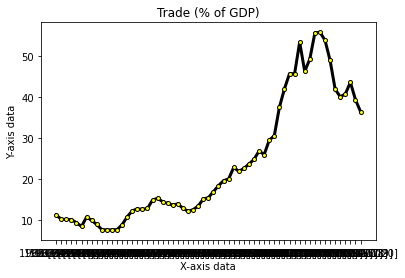

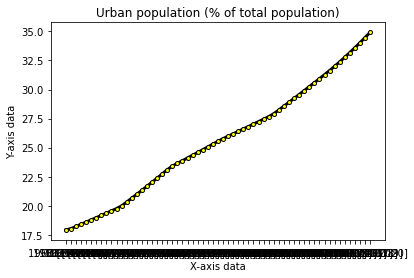

In [90]:
for i in select_col:
    x = np.array(df[c[0]])
    y = np.array(df[i])
    plt.plot(x, np.transpose(y), color='black', linestyle='-', linewidth = 3,marker='o', markerfacecolor='yellow', markersize=4)
    plt.xlabel("X-axis data")
    plt.ylabel("Y-axis data")
    plt.title(i)
    plt.show()

In [94]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x2d406be88e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d406135850>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d406be8a00>],
 'medians': [<matplotlib.lines.Line2D at 0x2d40612ea90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d405a339d0>],
 'means': [<matplotlib.lines.Line2D at 0x2d405ae4f10>]}

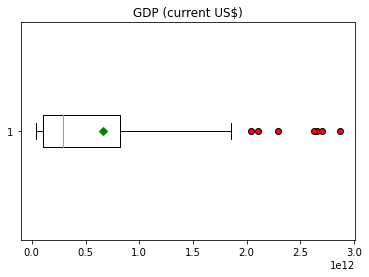

In [95]:
plt.title(select_col[0])
plt.boxplot(x=df[select_col[0]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d473f9ed60>,
 'caps': [<matplotlib.lines.Line2D at 0x2d473e4eaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d473f9ed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2d473e4e700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d473a43e50>],
 'means': [<matplotlib.lines.Line2D at 0x2d473e4edf0>]}

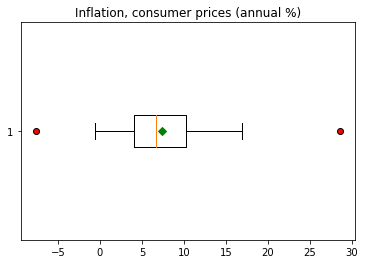

In [96]:
plt.title(select_col[1])
plt.boxplot(x=df[select_col[1]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d400251cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d400251af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d400251700>],
 'medians': [<matplotlib.lines.Line2D at 0x2d473633a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4736339d0>],
 'means': [<matplotlib.lines.Line2D at 0x2d473633070>]}

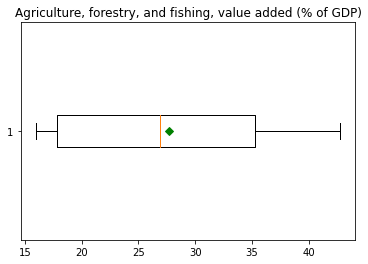

In [97]:
plt.title(select_col[2])
plt.boxplot(x=df[select_col[2]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4005f68b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4005f6580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4005f6190>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4005ef0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4005ef5e0>],
 'means': [<matplotlib.lines.Line2D at 0x2d4005ef820>]}

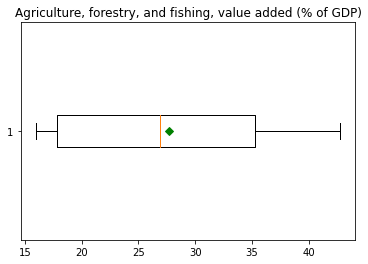

In [98]:
plt.title(select_col[2])
plt.boxplot(x=df[select_col[2]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d4005b4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4005b47f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4005b4ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4893de490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4893de580>],
 'means': [<matplotlib.lines.Line2D at 0x2d4893dee50>]}

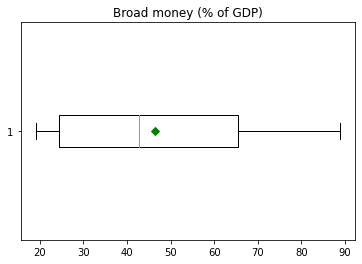

In [99]:
plt.title(select_col[3])
plt.boxplot(x=df[select_col[3]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d400596f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2d4005963d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4785873a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d4732fc670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d4732fc3a0>],
 'means': [<matplotlib.lines.Line2D at 0x2d4732fc0d0>]}

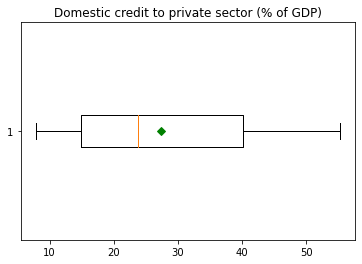

In [100]:
plt.title(select_col[4])
plt.boxplot(x=df[select_col[4]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d400582940>,
 'caps': [<matplotlib.lines.Line2D at 0x2d400582f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d4005829d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d40057aa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d40057a6d0>],
 'means': [<matplotlib.lines.Line2D at 0x2d40057aeb0>]}

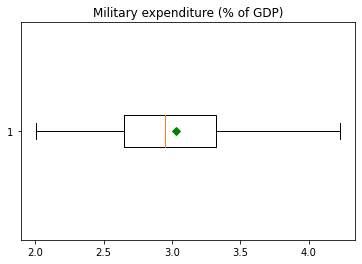

In [101]:
plt.title(select_col[8])
plt.boxplot(x=df[select_col[8]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

In [83]:
df.corr()

,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
Age dependency ratio (% of working-age population),1.000000,0.940081,-0.928997,-0.468926,-0.980326,0.715890,-0.746468,-0.751023,-0.961466,-0.966714,...,-0.979253,-0.962542,0.975656,-0.941342,-0.900555,-0.906258,-0.906007,-0.933595,-0.992534,-0.975656
"Agriculture, forestry, and fishing, value added (% of GDP)",0.940081,1.000000,-0.785590,-0.490146,-0.966454,0.725675,-0.674792,-0.818657,-0.828152,-0.936184,...,-0.977175,-0.984508,0.968891,-0.848879,-0.744067,-0.743902,-0.743166,-0.892706,-0.955876,-0.968891
"Agriculture, forestry, and fishing, value added (current US$)",-0.928997,-0.785590,1.000000,0.518804,0.878551,-0.572054,0.736894,0.642384,0.985851,0.910417,...,0.871656,0.831516,-0.892517,0.875585,0.989910,0.975328,0.973005,0.830047,0.919836,0.892517
Arms imports (SIPRI trend indicator values),-0.468926,-0.490146,0.518804,1.000000,0.519999,-0.263286,0.356006,0.550270,0.470710,0.593214,...,0.485220,0.476976,-0.518106,0.362342,0.479251,0.466346,0.458424,0.448721,0.491748,0.518106
Broad money (% of GDP),-0.980326,-0.966454,0.878551,0.519999,1.000000,-0.722992,0.753057,0.787462,0.910042,0.982747,...,0.981342,0.973535,-0.975187,0.913024,0.832052,0.867897,0.866890,0.945479,0.981785,0.975187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Total reserves (includes gold, current US$)",-0.906258,-0.743902,0.975328,0.466346,0.867897,-0.575794,0.781066,0.552288,0.963886,0.899675,...,0.830070,0.785751,-0.844305,0.885741,0.962128,1.000000,0.999770,0.843467,0.884721,0.844305
Total reserves minus gold (current US$),-0.906007,-0.743166,0.973005,0.458424,0.866890,-0.576921,0.780797,0.545084,0.963075,0.898033,...,0.828979,0.784612,-0.842464,0.887939,0.961232,0.999770,1.000000,0.843453,0.883711,0.842464
Trade (% of GDP),-0.933595,-0.892706,0.830047,0.448721,0.945479,-0.700328,0.828060,0.617184,0.863528,0.943727,...,0.909285,0.898542,-0.888239,0.895194,0.776736,0.843467,0.843453,1.000000,0.914746,0.888239
Urban population,-0.992534,-0.955876,0.919836,0.491748,0.981785,-0.703351,0.723947,0.788685,0.949993,0.967430,...,0.993508,0.981404,-0.993112,0.912472,0.889175,0.884721,0.883711,0.914746,1.000000,0.993112


<AxesSubplot:>

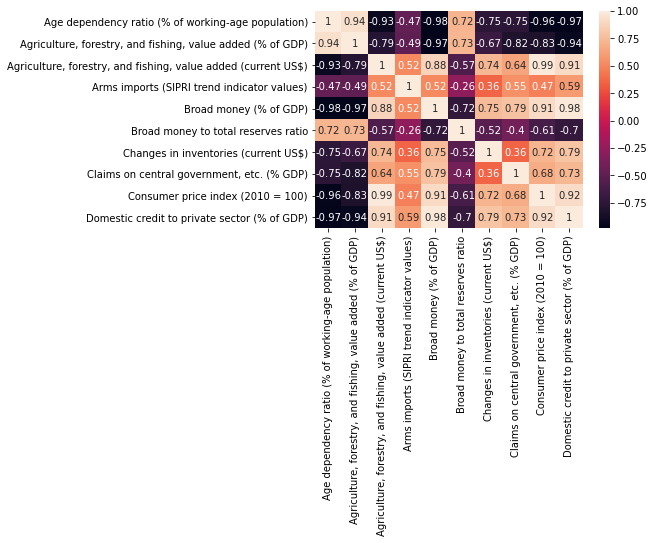

In [85]:
sns.heatmap(df.corr().iloc[:10,:10],annot=True)

<AxesSubplot:>

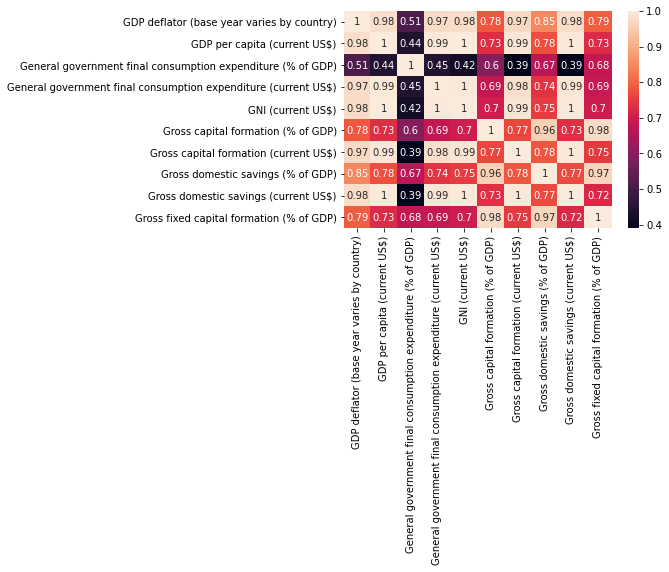

In [88]:
sns.heatmap(df.corr().iloc[20:30,20:30],annot=True)

In [130]:
X = np.array(df.iloc[:,1:63]).T

In [131]:
X

array([[7.69990446e+01, 7.80071064e+01, 7.91875306e+01, ...,
        4.97751669e+01, 4.92452418e+01, 4.86646203e+01],
       [4.13128391e+01, 4.03874016e+01, 3.83713352e+01, ...,
        1.59701575e+01, 1.66774624e+01, 1.83189877e+01],
       [1.52980963e+10, 1.58449614e+10, 1.61779235e+10, ...,
        4.31371805e+11, 4.78727241e+11, 4.80504068e+11],
       ...,
       [8.20760000e+01, 8.19680000e+01, 8.17820000e+01, ...,
        6.59700000e+01, 6.55280000e+01, 6.50740000e+01],
       [3.87824618e+01, 3.83258752e+01, 3.99358450e+01, ...,
        4.85097166e+01, 4.98595589e+01, 4.92663781e+01],
       [2.03520873e+09, 2.30380816e+09, 2.67489811e+09, ...,
        2.46806721e+11, 2.66537320e+11, 2.41731435e+11]])

In [132]:
pca = PCA(n_components=61,svd_solver='full')

In [133]:
pca.fit_transform(X)

array([[-1.00789814e+12, -1.97682280e+10, -6.18433013e+08, ...,
        -1.04316328e-05,  1.31050005e-05,  4.00465724e-05],
       [-1.00789814e+12, -1.97682279e+10, -6.18433140e+08, ...,
        -6.90216000e-06,  1.41865959e-05,  2.06191246e-05],
       [ 3.88561890e+11, -1.20497612e+11,  5.39086190e+10, ...,
        -6.81778493e-06,  1.41973009e-05,  2.10327218e-05],
       ...,
       [-1.00789814e+12, -1.97682280e+10, -6.18433002e+08, ...,
        -6.76039990e-06,  1.27978077e-05,  1.91803658e-05],
       [-1.00789814e+12, -1.97682279e+10, -6.18433106e+08, ...,
        -6.80382295e-06,  1.41739114e-05,  2.07210014e-05],
       [-3.15094409e+11, -8.04149425e+10, -2.51931016e+10, ...,
        -6.73029719e-06,  1.41433897e-05,  2.06468404e-05]])

In [134]:
print(pca.explained_variance_ratio_)

[9.97419214e-01 2.05042086e-03 2.57376993e-04 1.40015106e-04
 5.11984749e-05 3.57939998e-05 1.43235703e-05 1.41701478e-05
 6.95503152e-06 4.41507273e-06 2.17295462e-06 1.90720636e-06
 1.35096502e-06 3.01096044e-07 2.81678513e-07 5.73407208e-08
 4.00245802e-08 5.93533471e-09 1.14065682e-11 1.37874659e-12
 2.68861743e-13 3.73900424e-15 2.15237267e-18 5.79875244e-24
 2.70232970e-24 1.29434903e-24 6.61389932e-25 5.51419936e-25
 3.82234650e-25 2.23967617e-25 1.54989649e-25 1.15224144e-25
 6.77575451e-26 3.41436132e-26 2.31954097e-26 1.73461921e-26
 1.45419774e-26 9.10903000e-27 8.43681092e-27 5.90907031e-27
 4.55370450e-27 3.44600919e-27 1.49596222e-27 9.77523195e-28
 7.37073320e-28 5.64100719e-28 3.37892703e-28 2.67857425e-29
 2.41546344e-30 1.66873339e-31 5.09149274e-32 1.24011588e-32
 9.21037227e-33 9.21037227e-33 9.21037227e-33 9.21037227e-33
 9.21037227e-33 9.21037227e-33 9.21037227e-33 9.21037227e-33
 1.08600124e-33]


In [135]:
print(pca.singular_values_)

[1.69118605e+13 7.66785740e+11 2.71667310e+11 2.00373354e+11
 1.21166073e+11 1.01311241e+11 6.40882132e+10 6.37440585e+10
 4.46582883e+10 3.55812706e+10 2.49619121e+10 2.33857534e+10
 1.96822423e+10 9.29191110e+09 8.98730294e+09 4.05493685e+09
 3.38778557e+09 1.30459326e+09 5.71913071e+07 1.98835876e+07
 8.78045510e+06 1.03545326e+06 2.48434128e+04 4.07774258e+01
 2.78369525e+01 1.92654085e+01 1.37715021e+01 1.25745877e+01
 1.04692977e+01 8.01392246e+00 6.66659189e+00 5.74809936e+00
 4.40789614e+00 3.12901223e+00 2.57901308e+00 2.23025539e+00
 2.04204004e+00 1.61617576e+00 1.55539851e+00 1.30170358e+00
 1.14270715e+00 9.94055740e-01 6.54957070e-01 5.29439156e-01
 4.59735316e-01 4.02189611e-01 3.11273342e-01 8.76404030e-02
 2.63179923e-02 6.91744954e-03 3.82098283e-03 1.88574800e-03
 1.62514125e-03 1.62514125e-03 1.62514125e-03 1.62514125e-03
 1.62514125e-03 1.62514125e-03 1.62514125e-03 1.62514125e-03
 5.58043023e-04]
